In [1]:
from edc import print_info
print_info("geodb-explore")


***Notebook Title***  
GeoDB: Explore Datasets

***Notebook Description***  
Euro Data Cube GeoDB: Explore Datasets


***Notebook Dependencies***  
This notebook requires an active subscription to:
* EDC GeoDB


In [2]:
from edc import check_compatibility
check_compatibility("user-0.24.5", dependencies=["GEODB"])



---------

The following environment variables are available:

* `GEODB_AUTH_AUD`, `GEODB_AUTH_CLIENT_ID`, `GEODB_AUTH_DOMAIN`, `GEODB_API_SERVER_URL`, `GEODB_AUTH_CLIENT_SECRET`, `GEODB_API_SERVER_PORT`


## Exploring Data




In [3]:
from xcube_geodb.core.geodb import GeoDBClient

In [4]:
# utility needed for plotting
import matplotlib.pyplot as plt

In [5]:
geodb = GeoDBClient()

### Get your user name

In [6]:
geodb.whoami

'geodb_418dfeac-15f0-4606-9edb-fd9eb722bf04'

In [7]:
ds = geodb.get_my_collections()

if ds[(ds.database == geodb.whoami) & (ds.table_name == 'land_use')].table_name.count() == 0:
    # Have a look at fiona feature schema
    collections = {
            "land_use": 
            {
                "crs": 3794,
                "properties": 
                {
                    "RABA_PID": "float", 
                    "RABA_ID": "float", 
                    "D_OD": "date"
                }
            }
        }


    geodb.create_collections(collections)
    import geopandas
    import os
    gdf = geopandas.read_file(os.path.expanduser("~/.shared/notebooks/eurodatacube/notebooks/getting-started/data/sample/land_use.shp"))
    geodb.insert_into_collection('land_use', gdf)

### List Datasets

__Step 1__: List all datasets a user has access to.

In [8]:
geodb.get_my_collections()

,owner,database,table_name
0,geodb_0b01bfcd-2d09-46f8-84e8-cb5720fba14c,geodb_0b01bfcd-2d09-46f8-84e8-cb5720fba14c,delineated_parcels_s
1,geodb_0b01bfcd-2d09-46f8-84e8-cb5720fba14c,geodb_0b01bfcd-2d09-46f8-84e8-cb5720fba14c,test_batic
2,geodb_0d6df427-8c09-41b9-abc9-64ce13a68125,geodb_0d6df427-8c09-41b9-abc9-64ce13a68125,land_use
3,geodb_0d6df427-8c09-41b9-abc9-64ce13a68125,geodb_0d6df427-8c09-41b9-abc9-64ce13a68125,lpis_aut
4,geodb_0e5d743f-2134-4561-8946-a073b039176f,geodb_0e5d743f-2134-4561-8946-a073b039176f,ai4eo_bboxes
...,...,...,...
872,geodb_d2c4722a-cc19-4ec1-b575-0cdb6876d4a7,geodb_d2c4722a-cc19-4ec1-b575-0cdb6876d4a7,demo_1
873,geodb_lpis_iacs_admin,lpis_iacs,land_use_slo
874,geodb_lpis_iacs_admin,lpis_iacs,lpis_aut
875,geodb_lpis_iacs_admin,lpis_iacs,lpis_slo


__Step 2__: Let's get the whole content of a particular data set.

In [9]:
gdf = geodb.get_collection('land_use')
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,9828,2020-09-29T12:37:37.136218+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
2,19655,2020-09-30T07:49:51.801876+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
3,4,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((455929.405 97963.785, 455933.284 979...",2305596,1100,2019-02-25
4,5,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((461561.512 96119.256, 461632.114 960...",2310160,1100,2019-03-11
...,...,...,...,...,...,...,...
103868,97915,2021-05-11T13:54:31.276633+00:00,2021-05-11T14:52:38.339957+00:00,"POLYGON ((458067.069 99989.370, 458078.176 999...",6185548,1300,2000-01-01
103869,98004,2021-05-11T13:54:31.276633+00:00,2021-05-11T14:52:38.339957+00:00,"POLYGON ((460118.865 91020.360, 460121.357 910...",6220218,1300,2000-01-01
103870,98085,2021-05-11T13:54:31.276633+00:00,2021-05-11T14:52:38.339957+00:00,"POLYGON ((455094.819 91063.303, 455098.945 910...",6213647,1300,2000-01-01
103871,98060,2021-05-11T13:54:31.276633+00:00,2021-05-11T14:52:38.339957+00:00,"POLYGON ((456566.075 100012.840, 456567.401 10...",6213354,1300,2000-01-01


__Step 3__: Plot the GeoDataframe, select a reasonable column to diplay

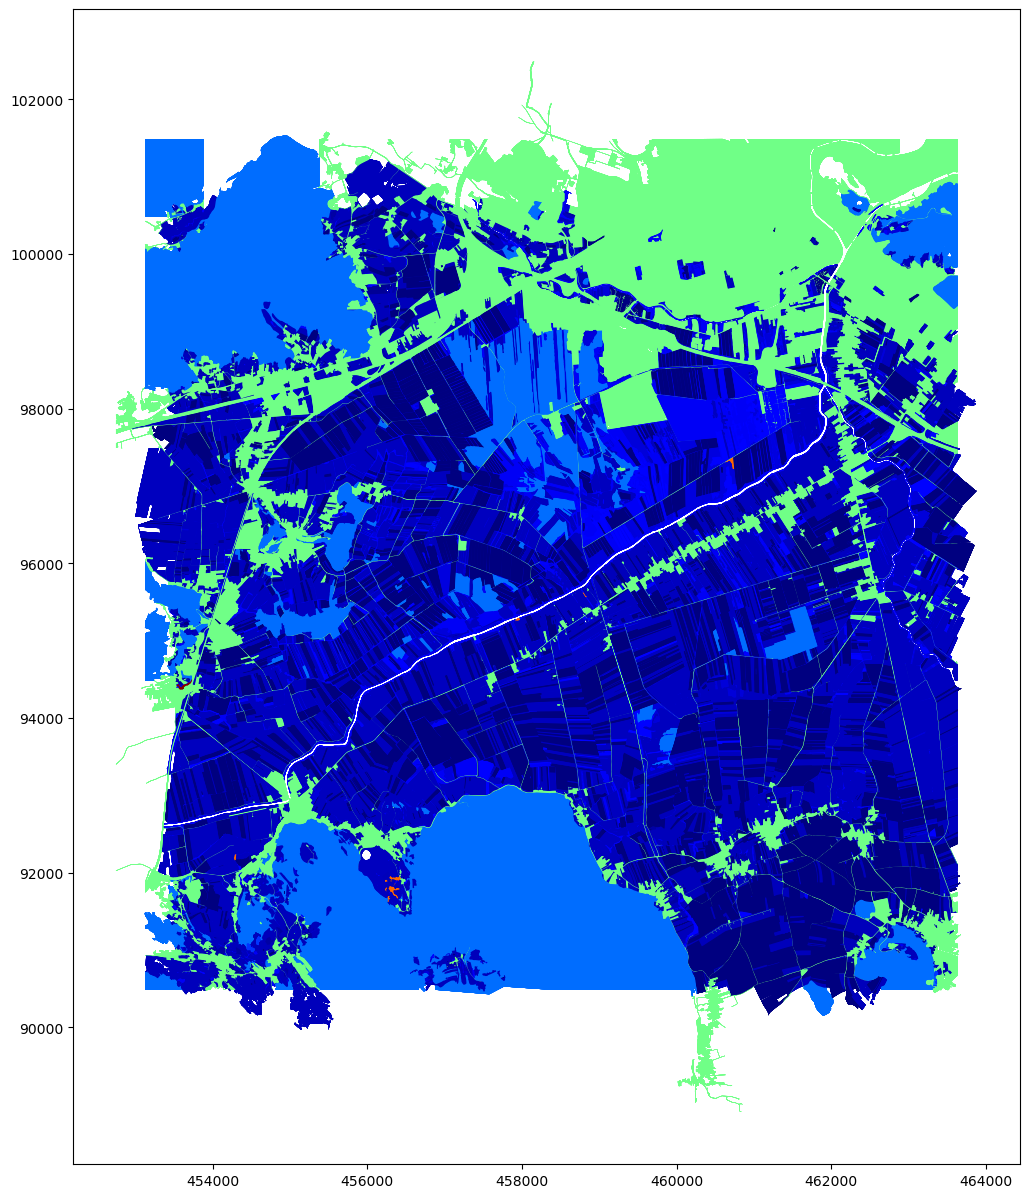

In [10]:
gdf.plot(column="raba_id", figsize=(15,15), cmap = 'jet')
plt.show()

__Step 5__: Subselect the data. Here: Select a specific use by defining an ID value to choose 

In [11]:
gdfsub = geodb.get_collection('land_use', query='raba_id=eq.1410')
gdfsub.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,9828,2020-09-29T12:37:37.136218+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
2,19655,2020-09-30T07:49:51.801876+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
3,39309,2020-12-01T13:40:18.246639+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
4,62,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((457261.001 96349.254, 457256.831 963...",3596498,1410,2019-01-05


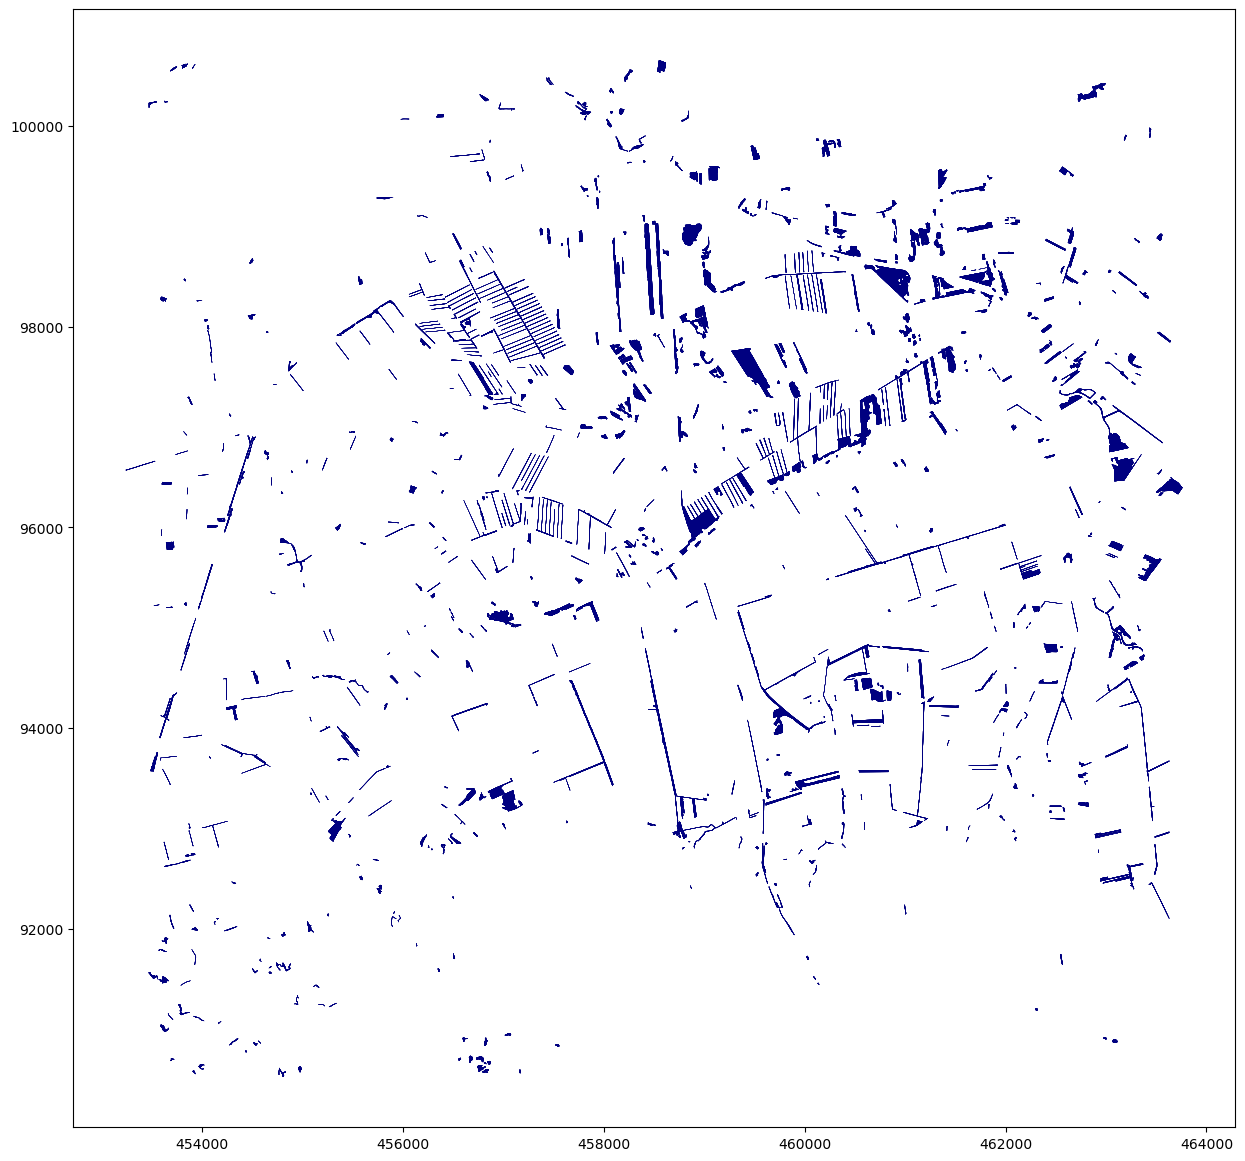

In [12]:
gdfsub.plot(column="raba_id", figsize=(15,15), cmap = 'jet')
plt.show()

__Step 6__: Filter by bbox, limit it to 200 entries

In [13]:
gdf = geodb.get_collection_by_bbox(collection="land_use", bbox = (452750.0, 88909.549, 464000.0, 102486.299), comparison_mode="contains", bbox_crs=3794, limit=200, offset=10)
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,12,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((453673.609 91328.224, 453678.929 913...",5983074,1600,2019-03-26
1,13,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((460312.295 96127.114, 460300.319 961...",5983199,1600,2019-03-11
2,14,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((460459.445 96117.356, 460470.516 961...",5983217,1100,2019-03-11
3,15,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((457798.753 99628.982, 457783.076 996...",6299143,1600,2019-03-04
4,16,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((461439.703 92137.401, 461436.166 921...",4643632,1600,2019-02-21
...,...,...,...,...,...,...,...
195,215,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((458934.146 95656.658, 458932.345 956...",5966575,1222,2019-01-05
196,216,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((458934.146 95656.658, 458935.525 956...",5966577,1100,2019-01-05
197,217,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((455301.879 91279.877, 455302.373 912...",2594677,1100,2019-03-14
198,218,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((455207.927 91222.221, 455193.596 912...",2594678,1100,2019-03-14


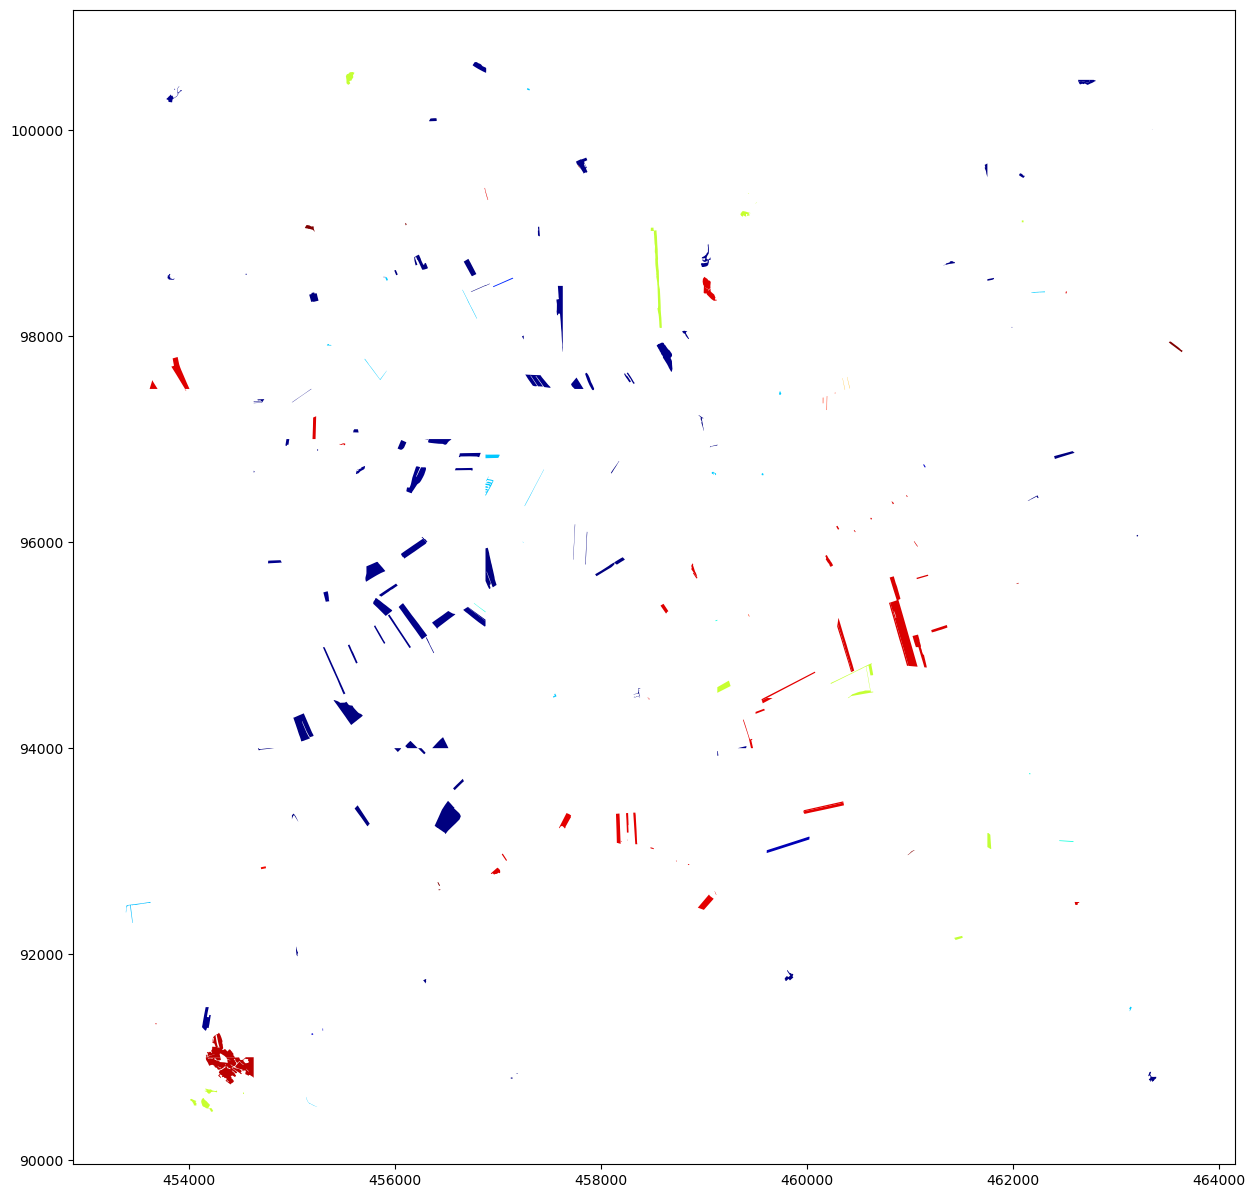

In [14]:
gdf.plot(column="raba_pid", figsize=(15,15), cmap = 'jet')
plt.show()

__Step 6__: Fltering using PostGres Syntax; see https://www.postgresql.org/docs/9.1/index.html for details

In [15]:
gdf = geodb.get_collection_pg(collection='land_use', where='raba_id=1410')
gdf.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,9828,2020-09-29T12:37:37.136218+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
2,19655,2020-09-30T07:49:51.801876+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
3,39309,2020-12-01T13:40:18.246639+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
4,62,2020-09-29T09:23:21.172369+00:00,None,"POLYGON ((457261.001 96349.254, 457256.831 963...",3596498,1410,2019-01-05


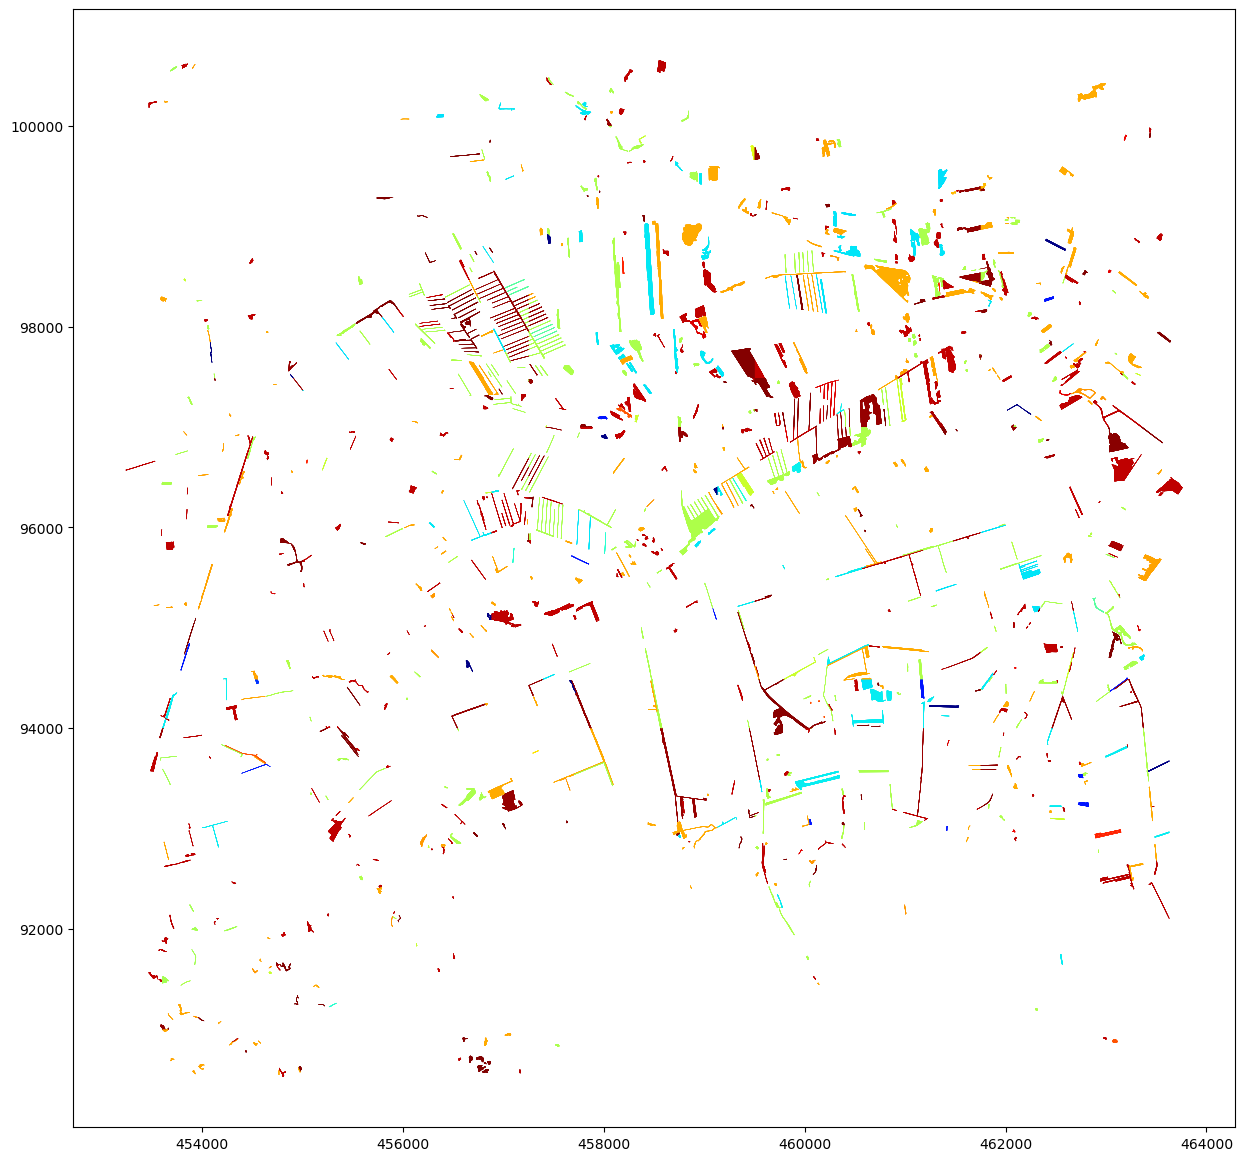

In [16]:
gdf.plot(column="raba_pid", figsize=(15,15), cmap = 'jet')
plt.show()

__Step 7__: Fltering using PostGres Syntax Allowing Aggregation
Here according to data, note that the data set has been reduced to 200 entries above

In [17]:
df = geodb.get_collection_pg('land_use', where='raba_id=1410', group='d_od', select='COUNT(d_od) as ct, d_od')
df.head()

,ct,d_od
0,132,2019-03-21
1,517,2019-02-25
2,187,2019-03-13
3,286,2019-02-20
4,22,2019-04-29
